In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# PATH = "./2016/Week 8 Feedback (2016, incomplete) - results.csv" #week 8

In [2]:
# reading 2016 data week 1-7
locations = ['LA','NY','SF','SG','SV','HK', 'Taipei', 'Tokyo']
df = pd.DataFrame()
for i in range (len(locations)):
    for week in range (1,8):
        file_name = "./2016/Anon Week " + str(week) + " Feedback - " + str(locations[i]) + ".csv"
#         print(file_name)
        try:
            new_df = pd.read_csv(file_name)
            new_df["Location"] = locations[i]
            new_df['Week'] = week
            df = pd.concat([df,new_df], ignore_index=True)
        except (FileNotFoundError):
            print(file_name)
    
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Timestamp', axis=1)




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


./2016/Anon Week 7 Feedback - SG.csv
./2016/Anon Week 1 Feedback - HK.csv
./2016/Anon Week 2 Feedback - HK.csv
./2016/Anon Week 3 Feedback - HK.csv
./2016/Anon Week 4 Feedback - HK.csv
./2016/Anon Week 7 Feedback - HK.csv
./2016/Anon Week 1 Feedback - Taipei.csv
./2016/Anon Week 2 Feedback - Taipei.csv
./2016/Anon Week 3 Feedback - Taipei.csv
./2016/Anon Week 4 Feedback - Taipei.csv
./2016/Anon Week 5 Feedback - Taipei.csv
./2016/Anon Week 1 Feedback - Tokyo.csv
./2016/Anon Week 2 Feedback - Tokyo.csv
./2016/Anon Week 3 Feedback - Tokyo.csv
./2016/Anon Week 4 Feedback - Tokyo.csv
./2016/Anon Week 5 Feedback - Tokyo.csv
./2016/Anon Week 7 Feedback - Tokyo.csv


In [3]:
df.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Week,What track are you in?
0,4.0,NaN,3,LA,1,NaN
1,4.0,NaN,4,LA,1,NaN
2,4.0,NaN,4,LA,1,NaN
3,4.0,NaN,4,LA,1,NaN
4,5.0,NaN,4,LA,1,NaN


In [4]:
df["Location"].value_counts()

SV        314
SF        295
NY        169
LA         59
SG         48
Taipei     23
Tokyo      13
HK          6
Name: Location, dtype: int64

### Clean Confounding Pacing Data and Merge Schedule-Pacing and Tutorial-Pacing Columns

In [5]:
def clean_combine_pacing(df):
    # Drop confounding #REF! value
    df = df[df["How well is the schedule paced?"] != "#REF!"]

    # Replace NaNs with zero-values
    df["How well are the tutorials paced?"] = df["How well are the tutorials paced?"].fillna(0).astype(int)
    df["How well is the schedule paced?"] = df["How well is the schedule paced?"].fillna(0).astype(int)
    df["Overall Satisfaction"] = df["How would you rate your overall satisfaction with the Summer Academy this week?"].astype(int)
    df["Overall Satisfaction"] = df["Overall Satisfaction"] * 2
    # Merge both columns into new column "Pacing"
    df["Pacing"] = (df["How well are the tutorials paced?"] + df["How well is the schedule paced?"])
    df.drop(columns=["How well are the tutorials paced?", "How well is the schedule paced?", "How would you rate your overall satisfaction with the Summer Academy this week?"], inplace=True)
    
    return df

### NOTE: Run the cell below _once_ to clean and combine _Pacing_ data!

In [6]:
# np.nan --> int(0)
#            int(-1)
#            float(0.0)
#            str("None")
#            bool(False)

In [7]:
df = clean_combine_pacing(df)
df.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

,Location,Week,What track are you in?,Overall Satisfaction,Pacing
0,LA,1,NaN,6,4
1,LA,1,NaN,8,4
2,LA,1,NaN,8,4
3,LA,1,NaN,8,4
4,LA,1,NaN,8,5


## Naming the columns to make concatination easy

In [8]:
df.rename(columns = {'What track are you in?':'Track', 'Overall Satisfaction':'Recommend'}, inplace = True)
df

,Location,Week,Track,Recommend,Pacing
0,LA,1,NaN,6,4
1,LA,1,NaN,8,4
2,LA,1,NaN,8,4
3,LA,1,NaN,8,4
4,LA,1,NaN,8,5
5,LA,1,NaN,10,4
6,LA,1,NaN,10,3
7,LA,2,NaN,8,2
8,LA,2,NaN,6,3
9,LA,2,NaN,8,4


# Reading and Cleaning Week 8

In [9]:
PATH = "./2016/Week 8 Feedback (2016, incomplete) - results.csv" #week 8
df8 = pd.read_csv(PATH)
df8

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f
5,9030d8a662b39b519b2b685834413d66,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13,088e6f938d
6,1c07190c7caa72bf6b59cea48e1a4a97,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14,00f1d07a90
7,27a63d6c24710feb52c0cfdef7e01175,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15,e0724aac23
8,b47b95f84547d8347119de1da5faa46d,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21,9eeec0f9bf
9,828fafa477484f61d2ca5930fe99ad46,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27,6c80fd2754


## Cleaning Up Week 8

## Modifiying the rows to make it easier to concatenate

In [10]:
# assiging the week value 
df8["Week"] = [8] * 65
# cleaning the track values
old_track_values = df8["track"].value_counts().keys().tolist()
new_track_values = ['Apps', 'Games', 'Intro', 'VR', 'Apps', 'Games']
df8 = df8.replace(old_track_values, new_track_values)

# Modifying the locations with 2 letter representation
old_location_values = df8["location"].value_counts().keys().tolist()
two_letter_location = ['SF', 'SV', 'NY', 'SG', 'LA']
df8 = df8.replace(old_location_values, two_letter_location)


In [11]:
df8.head()

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID,Week
0,00b836bda84e6bdbe780af97e249e59f,10,NY,Apps,9/7/16 1:03,9/7/16 1:04,3212b7a834,8
1,39dde6dc0e1e375845d756fc7e39fc5f,10,SF,Intro,9/7/16 1:03,9/7/16 1:04,f4954355aa,8
2,5e56b9de91670b308cb98dd2848b8739,10,NY,Intro,9/7/16 1:03,9/7/16 1:05,3d69ca289b,8
3,641081d05785b47a0f17448625da0d49,9,SV,VR,9/7/16 1:04,9/7/16 1:06,261608f95d,8
4,c29bdd4f5678d78b450f4494e0f53c8c,3,SF,Intro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f,8


## Dropping the unnecessary columns 

In [12]:
def drop_columns_week_8(df):
    df.drop(columns=["#", "Start Date (UTC)", "Submit Date (UTC)", "Network ID"], inplace=True)

In [13]:
drop_columns_week_8(df8)
df8.head()

,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Week
0,10,NY,Apps,8
1,10,SF,Intro,8
2,10,NY,Intro,8
3,9,SV,VR,8
4,3,SF,Intro,8


## Renaming the columns week 8

In [14]:
df8.rename(columns = {"track":"Track", "location":"Location", "How likely is it that you would recommend the Make School Summer Academy to a friend?":"Recommend"}, inplace = True)
df8.head()

,Recommend,Location,Track,Week
0,10,NY,Apps,8
1,10,SF,Intro,8
2,10,NY,Intro,8
3,9,SV,VR,8
4,3,SF,Intro,8


# Concatinating and resetting the index

In [15]:
# concat all data from 2016 together
final_2016 = pd.concat([df, df8], sort=True, ignore_index=True)

In [16]:
# sorting the week and location 
final_2016.sort_values(by=["Week", "Location"], inplace=True)
# resettin the indexes
final_2016.reset_index(drop=True, inplace=True)
final_2016.head()

,Location,Pacing,Recommend,Track,Week
0,LA,4.0,6,NaN,1
1,LA,4.0,8,NaN,1
2,LA,4.0,8,NaN,1
3,LA,4.0,8,NaN,1
4,LA,5.0,8,NaN,1


In [17]:
# filling the NaN value with zeros and converting all pacing to integer
final_2016["Pacing"] = final_2016["Pacing"].fillna(0).astype(int)

In [18]:
final_2016["Pacing"].unique()

array([4, 5, 3, 2, 1, 0])

In [19]:
# Modifying the locations with 2 letter representation
old_location_values_2016 = final_2016["Location"].value_counts().keys().tolist()
print(old_location_values_2016)
full_name_location = ['Sunnyvale', 'San Francisco', 'New York City', 'Los Angeles', 'Singapore', 'Taipei', 'Tokyo', 'Hong Kong']
final_2016 = final_2016.replace(old_location_values_2016, full_name_location)

['SV', 'SF', 'NY', 'LA', 'SG', 'Taipei', 'Tokyo', 'HK']


In [20]:
final_2016.head(10)

,Location,Pacing,Recommend,Track,Week
0,Los Angeles,4,6,NaN,1
1,Los Angeles,4,8,NaN,1
2,Los Angeles,4,8,NaN,1
3,Los Angeles,4,8,NaN,1
4,Los Angeles,5,8,NaN,1
5,Los Angeles,4,10,NaN,1
6,Los Angeles,3,10,NaN,1
7,New York City,5,6,Games,1
8,New York City,3,6,Games,1
9,New York City,3,6,Apps,1


In [21]:
final_2016["Year"] = "2016"

In [22]:
final_2016.head()

,Location,Pacing,Recommend,Track,Week,Year
0,Los Angeles,4,6,NaN,1,2016
1,Los Angeles,4,8,NaN,1,2016
2,Los Angeles,4,8,NaN,1,2016
3,Los Angeles,4,8,NaN,1,2016
4,Los Angeles,5,8,NaN,1,2016


# 2017 Data

In [23]:
PATH_2017 = "./2017/Student Feedback Surveys-Superview.csv" # 2017 data
df_2017 = pd.read_csv(PATH_2017)
df_2017.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


### Dropping and Renaming the Columns

In [24]:
df_2017.drop(columns=["ID"], inplace=True)

In [25]:
df_2017.rename(columns = {'Rating (Num)':'Recommend', 'Schedule Pacing':'Pacing'}, inplace = True)

In [26]:
df_2017.head()

,Location,Track,Week,Recommend,Pacing
0,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,Los Angeles,Apps,Week 1,4,A little too fast
2,San Francisco,Games,Week 1,4,Way too slow
3,NaN,NaN,Week 2,4,A little too fast
4,New York City,"Apps, Explorer",Week 1,4,Just right


## Cleaning Track and Week and pacing row naming 

In [27]:
# Track renaming 
old_track_values = df_2017["Track"].value_counts().keys().tolist()
# print(old_track_values)
new_track_values = ['Apps', 'Apps', 'Games', 'VR', 'Games']
df_2017 = df_2017.replace(old_track_values, new_track_values)

In [28]:
# Modifying the week values with numbers
old_week_values = df_2017["Week"].value_counts().keys().tolist()
# print(old_week_values)
new_week_values = [1, 2, 3, 4, 5, 6, 7, 8]
df_2017 = df_2017.replace(old_week_values, new_week_values)

In [29]:
# Pacing values converting to int representation
df_2017["Pacing"].unique()

schedule_pacing_map = {
    0: 0,
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    "Way too slow": 1,
    "A little too slow": 2,
    "Just right": 3,
    "A little too fast": 4,
    "Way too fast": 5
}

df_2017["Pacing"] = df_2017["Pacing"].fillna(0)
df_2017["Pacing"] = df_2017["Pacing"].map(schedule_pacing_map)
df_2017["Pacing"].unique()

array([3, 4, 1, 2, 5, 0])

In [30]:
df_2017.head()

,Location,Track,Week,Recommend,Pacing
0,San Francisco,Apps,1,3,3
1,Los Angeles,Apps,1,4,4
2,San Francisco,Games,1,4,1
3,NaN,NaN,2,4,4
4,New York City,Apps,1,4,3


In [31]:
final_2016.head()

,Location,Pacing,Recommend,Track,Week,Year
0,Los Angeles,4,6,NaN,1,2016
1,Los Angeles,4,8,NaN,1,2016
2,Los Angeles,4,8,NaN,1,2016
3,Los Angeles,4,8,NaN,1,2016
4,Los Angeles,5,8,NaN,1,2016


In [32]:
final_2016["Location"].unique()

array(['Los Angeles', 'New York City', 'San Francisco', 'Singapore',
       'Sunnyvale', 'Hong Kong', 'Taipei', 'Tokyo'], dtype=object)

In [33]:
df_2017["Pacing"].unique()

array([3, 4, 1, 2, 5, 0])

In [34]:
df_2017["Recommend"].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '#ERROR!'],
      dtype=object)

In [35]:
# Drop confounding #ERROR! value
df_2017 = df_2017[df_2017["Recommend"] != "#ERROR!"]

In [36]:
df_2017["Recommend"].unique()

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2'],
      dtype=object)

In [37]:
# converting the Recommend column string to int
df_2017["Recommend"] = df_2017["Recommend"].astype(int)

In [38]:
df_2017["Recommend"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2])

In [39]:
df_2017["Track"].unique()

array(['Apps', 'Games', nan, 'VR'], dtype=object)

In [40]:
df_2017["Location"].unique()

array(['San Francisco', 'Los Angeles', nan, 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'Tokyo'],
      dtype=object)

In [41]:
df_2017["Year"] = "2017"

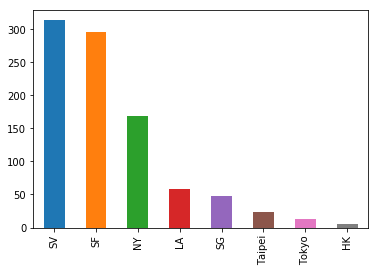

In [42]:
# Location Represention in terms of the number of submitted data 
df['Location'].value_counts().plot(kind='bar')

In [43]:
type(df['Location'].value_counts())

pandas.core.series.Series

### Calculating NPS for Final 2016 data

In [44]:
detractors_2016 = len(final_2016[(final_2016["Recommend"] <= 6) & (final_2016["Recommend"] >= 1)])
promoters_2016 = len(final_2016[final_2016["Recommend"] > 8])
total_2016 = len(final_2016["Recommend"])
print(detractors_2016, promoters_2016, total_2016)


153 397 991


In [45]:
NPS_2016 =((promoters_2016 - detractors_2016)/total_2016)*100
print(NPS_2016)


24.62159434914228


### NPS is  25% for 2016 final data 

In [46]:
final_2016["Recommend"].value_counts()

8     435
10    383
6     124
4      17
9      14
2       8
7       6
5       2
3       2
Name: Recommend, dtype: int64

### Pacing distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104a1da90>]],
      dtype=object)

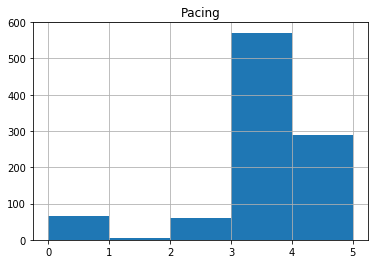

In [47]:
final_2016.hist(column="Pacing", bins=5)

In [48]:
## Getting the Location values to use for pie chart representaion

In [49]:
final_2016["Location"].unique()

values = final_2016["Location"].value_counts().keys().tolist()
sizes = final_2016["Location"].value_counts().tolist()
print(sizes, values)

[329, 324, 181, 62, 53, 23, 13, 6] ['Sunnyvale', 'San Francisco', 'New York City', 'Los Angeles', 'Singapore', 'Taipei', 'Tokyo', 'Hong Kong']


### Pie chart representation of location based on antandees(except 3 location showed low number of students)

In [50]:
# labels = 'SV', 'SF', 'NY', 'LA', 'SG'
# sizes = [313, 295, 169, 59, 48]
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
# explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# # Plot
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)
 
# plt.axis('equal')
# plt.show()



In [51]:
final_2016["Location"].value_counts(dropna=False)

Sunnyvale        329
San Francisco    324
New York City    181
Los Angeles       62
Singapore         53
Taipei            23
Tokyo             13
Hong Kong          6
Name: Location, dtype: int64

In [52]:
final_2016["Location"].value_counts()

Sunnyvale        329
San Francisco    324
New York City    181
Los Angeles       62
Singapore         53
Taipei            23
Tokyo             13
Hong Kong          6
Name: Location, dtype: int64

## MERGING DF-2016 with DF-2017!

---

### 2016 Dataset

In [70]:
final_2016.head(3)
len(final_2016)

991

### 2017 Dataset

In [71]:
df_2017.head(3)
len(df_2017)

1450

### 2016-2017 Final Dataset

In [72]:
dataset_final = pd.concat([final_2016, df_2017], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [73]:
dataset_final.head()

,Location,Pacing,Recommend,Track,Week,Year
0,Los Angeles,4,6,NaN,1,2016
1,Los Angeles,4,8,NaN,1,2016
2,Los Angeles,4,8,NaN,1,2016
3,Los Angeles,4,8,NaN,1,2016
4,Los Angeles,5,8,NaN,1,2016


In [74]:
desired_order = ["Location", "Track", "Week", "Pacing", "Recommend", "Year"]
dataset_final = dataset_final[desired_order]
dataset_final.head(3)

,Location,Track,Week,Pacing,Recommend,Year
0,Los Angeles,NaN,1,4,6,2016
1,Los Angeles,NaN,1,4,8,2016
2,Los Angeles,NaN,1,4,8,2016


In [75]:
dataset_final["Location"].unique()

array(['Los Angeles', 'New York City', 'San Francisco', 'Singapore',
       'Sunnyvale', 'Hong Kong', 'Taipei', 'Tokyo', nan, 'Redwood City',
       'Santa Clara', 'Oakland', 'Washington DC', 'Chicago', 'Atlanta',
       'Beijing'], dtype=object)

In [76]:
dataset_final["Track"].unique()

array([nan, 'Games', 'Apps', 'Intro', 'VR'], dtype=object)

In [77]:
dataset_final["Recommend"].unique()

array([ 6,  8, 10,  4,  2,  3,  9,  7,  5,  0,  1])

In [78]:
dataset_final["Pacing"].unique()

array([4, 5, 3, 2, 1, 0])

### From above observation I know only location and track columns has NaN values so
### I will replace them with "Unknown" and "Unspecified" respectively 

In [79]:
dataset_final["Location"] = dataset_final["Location"].fillna("Unknown")
dataset_final["Track"] = dataset_final["Track"].fillna("Unspecified")

In [80]:
dataset_final["Location"].value_counts()

San Francisco    684
New York City    511
Sunnyvale        329
Santa Clara      201
Los Angeles      168
Tokyo             78
Beijing           78
Chicago           70
Redwood City      58
Singapore         53
Oakland           47
Washington DC     47
Unknown           44
Atlanta           33
Taipei            23
Hong Kong         17
Name: Location, dtype: int64

In [81]:
dataset_final["Track"].value_counts()

Apps           1520
Games           455
Intro           211
Unspecified     162
VR               93
Name: Track, dtype: int64

In [86]:
dataset_final.tail()

,Location,Track,Week,Pacing,Recommend,Year
2436,New York City,Apps,7,3,10,2017
2437,New York City,Apps,7,3,8,2017
2438,New York City,Apps,7,3,10,2017
2439,New York City,Apps,7,2,1,2017
2440,New York City,Apps,5,3,8,2017


# Make School Summer Academy Dataset

### NPS for 2016 

In [89]:
detractors_2016 = len(final_2016[(final_2016["Recommend"] <= 6) & (final_2016["Recommend"] >= 1)])
promoters_2016 = len(final_2016[final_2016["Recommend"] > 8])
total_2016 = len(final_2016["Recommend"])
print("Detractors: {}, Promoters: {}, Total Number: {}".format(detractors_2016, promoters_2016, total_2016))

NPS_2016 =((promoters_2016 - detractors_2016)/total_2016)*100
print("NPS for 2016 is: {}%".format(round(NPS_2016)))

Detractors: 153, Promoters: 397, Total Number: 991
NPS for 2016 is: 25%


### NPS for 2017

In [90]:
detractors_2017 = len(df_2017[(df_2017["Recommend"] <= 6) & (df_2017["Recommend"] >= 1)])
promoters_2017 = len(df_2017[df_2017["Recommend"] > 8])
total_2017 = len(df_2017["Recommend"])
print("Detractors: {}, Promoters: {}, Total Number: {}".format(detractors_2017, promoters_2017, total_2017))

NPS_2017 =((promoters_2017 - detractors_2017)/total_2017)*100
print("NPS for 2017 is: {}%".format(round(NPS_2017)))

Detractors: 119, Promoters: 760, Total Number: 1450
NPS for 2017 is: 44%


### NPS for 2016 and 2017 combined

In [91]:
detractors_final = len(dataset_final[(dataset_final["Recommend"] <= 6) & (dataset_final["Recommend"] >= 1)])
promoters_final = len(dataset_final[dataset_final["Recommend"] > 8])
total_final = len(dataset_final["Recommend"])
print("Detractors: {},dataset_finalPromoters: {}, Total Number: {}".format(detractors_final, promoters_final, total_final))

NPS_final =((promoters_final - detractors_final)/total_final)*100
print("NPS for two years 2016 and 2017 is: {}%".format(round(NPS_final)))

Detractors: 272,dataset_finalPromoters: 1157, Total Number: 2441
NPS for two years 2016 and 2017 is: 36%


## Here goes the comparison between 2016 and 2017 data
## Question:
    1. How much did the promoters have been increased or decreased over two years?
    2. What location has more number of promoters? 
    3. How does the pacing change over week 1-8? 
    4. What track has more promoters and detractors? 
    5. Is there any relation between track and pacing?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


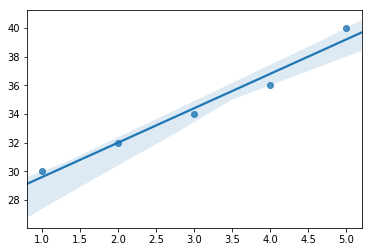

In [112]:

sns.regplot(x=np.array([1, 2, 3, 4, 5]), y=np.array([30, 32, 34, 36, 40]))

### Creating Stacked Barplot for 2016 vs. 2017 NPS Categorical Counts

In [103]:
def nps_by_year_plot(stack=False):
    dets = [detractors_2016, detractors_2017, detractors_final]
    pros = [promoters_2016, promoters_2017, promoters_final]
    N, WIDTH = 3, 0.35

    x_indices = np.arange(N)

    if stack:
        p1 = plt.bar(x_indices, pros, WIDTH, color="b")
        p2 = plt.bar(x_indices, dets, WIDTH, color="r")
    else:
        p1 = plt.bar(x_indices, pros, WIDTH, color="b")
        p2 = plt.bar(x_indices + WIDTH, dets, WIDTH, color="r")

    plt.ylabel("Count")
    plt.title('NPS Groups Between 2016 and 2017')
    plt.xticks(x_indices, ("2016", "2017", "Total"))
    plt.legend((p1[0], p2[0]), ('Promoters', 'Detractors'))

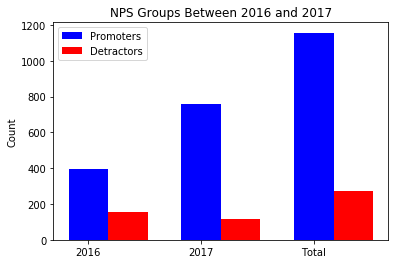

In [106]:
nps_by_year_plot()

#### 1. How much did the promoters have been increased or decreased over two years?

#### 2. What location has more number of promoters? 

#### 3. Number of people by locations(final data)

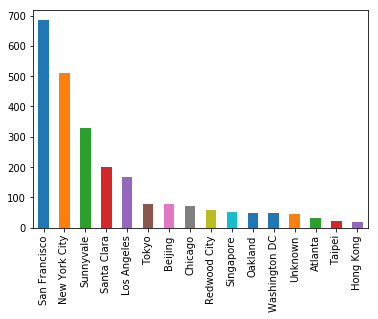

In [122]:
# Location Represention in terms of the number of submitted data 
dataset_final['Location'].value_counts().plot(kind='bar')